# Importing the Libraries and Loading the Data:

In [75]:
# import necessary libraries
import matplotlib.pyplot as plt #For plotting
%matplotlib inline
import numpy as np #Provides fast numerical computing such as arrays and linear algebra
import pandas as pd #Provides R like data structures and a high level API to work with data
from pandas import DataFrame, Series
import seaborn as sns #To make your plots look better
import warnings # Ignore  the warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer #Impute the missing values
from sklearn.preprocessing import MultiLabelBinarizer

In [76]:
# importing necessary packages for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn.linear_model as sk
import seaborn as sns
import re
from sklearn import linear_model
import math
from sklearn.model_selection import train_test_split
from sklearn import svm
import sklearn.tree as tree
import sklearn.ensemble as en
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as skp
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_curve, auc, classification_report
import scipy
from sklearn.metrics import confusion_matrix
from sklearn import metrics

**Once the required libraries are loaded, we can go ahead and intialize the dataset. Missing values are imputed as well.**

In [77]:
data=pd.read_csv("outbreaks.csv")

In [78]:
data.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


**Check for the null values in the dataset and get the count from each feature**

In [79]:
data.isnull().sum()

Year                     0
Month                    0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

**Check the datatype of each feature**

In [80]:
data.dtypes

Year                   int64
Month                 object
State                 object
Location              object
Food                  object
Ingredient            object
Species               object
Serotype/Genotype     object
Status                object
Illnesses              int64
Hospitalizations     float64
Fatalities           float64
dtype: object

**Impute the missing values of categorical data with the 'Most Frequent' values in the dataset - MODE**

In [81]:
imputer1=SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0)
imputer1=imputer1.fit(data.iloc[:,1:9])
data.iloc[:,1:9]=imputer1.transform(data.iloc[:,1:9])

**Impute the missing values of Numerical data with the 'Mean' value in the dataset**

In [82]:
imputer2=SimpleImputer(missing_values=np.nan, strategy='mean', verbose=0)
imputer2=imputer2.fit(data.iloc[:,[0,9,10,11]])
data.iloc[:,[0,9,10,11]]=imputer2.transform(data.iloc[:,[0,9,10,11]])

**Check for the imputed values**

In [83]:
data.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998.0,January,California,Restaurant,Multiple Foods,Fin Fish,Norovirus genogroup I,Unknown,Confirmed,20.0,0.0,0.0
1,1998.0,January,California,Restaurant,Custard,Fin Fish,Norovirus genogroup I,Unknown,Confirmed,112.0,0.0,0.0
2,1998.0,January,California,Restaurant,Multiple Foods,Fin Fish,Norovirus genogroup I,Unknown,Confirmed,35.0,0.0,0.0
3,1998.0,January,California,Restaurant,"Fish, Ahi",Fin Fish,Scombroid toxin,Unknown,Confirmed,4.0,0.0,0.0
4,1998.0,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Fin Fish,Salmonella enterica,Enteritidis,Confirmed,26.0,3.0,0.0


**Check if there is any null value in the dataset**

In [84]:
data.isnull().sum()

Year                 0
Month                0
State                0
Location             0
Food                 0
Ingredient           0
Species              0
Serotype/Genotype    0
Status               0
Illnesses            0
Hospitalizations     0
Fatalities           0
dtype: int64

**Selecting a subset of data that had 'Object' datatype**

In [85]:
new_data = data.select_dtypes(include='object')
new_data

,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status
0,January,California,Restaurant,Multiple Foods,Fin Fish,Norovirus genogroup I,Unknown,Confirmed
1,January,California,Restaurant,Custard,Fin Fish,Norovirus genogroup I,Unknown,Confirmed
2,January,California,Restaurant,Multiple Foods,Fin Fish,Norovirus genogroup I,Unknown,Confirmed
3,January,California,Restaurant,"Fish, Ahi",Fin Fish,Scombroid toxin,Unknown,Confirmed
4,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Fin Fish,Salmonella enterica,Enteritidis,Confirmed
5,January,California,Restaurant,Multiple Foods,Fin Fish,Shigella boydii,Unknown,Confirmed
6,January,California,Restaurant,Multiple Foods,Fin Fish,Norovirus genogroup I,Unknown,Confirmed
7,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",Fin Fish,Salmonella enterica,Enteritidis,Confirmed
8,January,Colorado,Restaurant,"Salad, Unspecified",Fin Fish,Virus,Unknown,Suspected
9,January,Colorado,Restaurant,"Peppers, Chili",Fin Fish,Virus,Unknown,Suspected


**Selecting a subset of data other than 'Object' datatype**

In [86]:
num_data = data.select_dtypes(exclude='object')
num_data.head()

,Year,Illnesses,Hospitalizations,Fatalities
0,1998.0,20.0,0.0,0.0
1,1998.0,112.0,0.0,0.0
2,1998.0,35.0,0.0,0.0
3,1998.0,4.0,0.0,0.0
4,1998.0,26.0,3.0,0.0


**Remove columns that doesn't add value to the dataset - Ingredient, Serotype**

In [87]:
new_data=new_data.drop(new_data.columns[[4,6]],axis=1)

**Separate the list in the following columns using Split function - delimiter: '; |, '**

In [88]:
new_data['Location']=new_data['Location'].str.split("; |, ")
new_data['Food']=new_data['Food'].str.split("; |, ")
new_data['Species']=new_data['Species'].str.split("; |, ")
new_data['Status']=new_data['Status'].str.split("; |, ")

In [15]:
new_data.dtypes

Month       object
State       object
Location    object
Food        object
Species     object
Status      object
dtype: object

**Copying the data of new_data dataframe to another dataframe cat_data** 

In [16]:
cat_data = new_data

**One Hot Encoding is performed using MultiLabelBinarizer to show every value in a column of list as seperate columns - Location,Food,Status,Species**

In [17]:
mlb = MultiLabelBinarizer()
cat_data = cat_data.join(pd.DataFrame(mlb.fit_transform(cat_data.pop('Location')),columns=mlb.classes_,index=cat_data.index))

In [18]:
cat_data = cat_data.join(pd.DataFrame(mlb.fit_transform(cat_data.pop('Food')),columns=mlb.classes_,index=cat_data.index))

In [19]:
cat_data = cat_data.join(pd.DataFrame(mlb.fit_transform(cat_data.pop('Status')),columns=mlb.classes_,index=cat_data.index))

**Drop column 'Unknown' from the datset to avoid 'Column Overlap Issue'**

In [20]:
cat_data=cat_data.drop(columns=['Unknown'])

In [21]:
cat_data = cat_data.join(pd.DataFrame(mlb.fit_transform(cat_data.pop('Species')),columns=mlb.classes_,index=cat_data.index))

In [22]:
cat_data.head()

,Month,State,Banquet Facility,Camp,Catering Service,Child Daycare,Fair/Festival,Farm/Dairy,Fast Food Restaurant,Grocery Store,...,Trichinella unknown,Unknown,Vibrio cholerae,Vibrio other,Vibrio parahaemolyticus,Vibrio unknown,Vibrio vulnificus,Virus,Yersinia,Yersinia enterocolitica
0,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Join the categorical data and numerical data to form the final dataset**

In [23]:
Final_data = cat_data.join(num_data)

In [24]:
Final_data.head()

,Month,State,Banquet Facility,Camp,Catering Service,Child Daycare,Fair/Festival,Farm/Dairy,Fast Food Restaurant,Grocery Store,...,Vibrio parahaemolyticus,Vibrio unknown,Vibrio vulnificus,Virus,Yersinia,Yersinia enterocolitica,Year,Illnesses,Hospitalizations,Fatalities
0,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,20.0,0.0,0.0
1,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,112.0,0.0,0.0
2,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,35.0,0.0,0.0
3,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,4.0,0.0,0.0
4,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,26.0,3.0,0.0


In [25]:
Final_data.describe()

,Banquet Facility,Camp,Catering Service,Child Daycare,Fair/Festival,Farm/Dairy,Fast Food Restaurant,Grocery Store,Hospital,Hotel/Motel,...,Vibrio parahaemolyticus,Vibrio unknown,Vibrio vulnificus,Virus,Yersinia,Yersinia enterocolitica,Year,Illnesses,Hospitalizations,Fatalities
count,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,...,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000,19119.000000
mean,0.024897,0.007323,0.076678,0.001831,0.006381,0.000418,0.022700,0.031330,0.003086,0.000052,...,0.006538,0.000314,0.000052,0.005283,0.000052,0.000785,2005.562373,19.537162,0.947528,0.021717
std,0.155814,0.085260,0.266086,0.042748,0.079629,0.020452,0.148949,0.174213,0.055467,0.007232,...,0.080595,0.017713,0.007232,0.072492,0.007232,0.028000,5.158404,49.452417,4.782640,0.348632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1998.000000,2.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,3.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2005.000000,8.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000,19.000000,0.947528,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.000000,1939.000000,308.000000,33.000000


In [26]:
#Final_data.to_excel("Final_outbreak.xlsx")


In [26]:
df = Final_data.select_dtypes(exclude='object')
df

,Banquet Facility,Camp,Catering Service,Child Daycare,Fair/Festival,Farm/Dairy,Fast Food Restaurant,Grocery Store,Hospital,Hotel/Motel,...,Vibrio parahaemolyticus,Vibrio unknown,Vibrio vulnificus,Virus,Yersinia,Yersinia enterocolitica,Year,Illnesses,Hospitalizations,Fatalities
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,20.0,0.000000,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,112.0,0.000000,0.000000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,35.0,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,4.0,0.000000,0.000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,26.0,3.000000,0.000000
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,25.0,3.000000,0.000000
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,8.0,0.000000,0.000000
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1998.0,4.0,3.000000,0.000000
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1998.0,21.0,0.947528,0.021717
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1998.0,3.0,0.947528,0.000000


In [27]:
cols = df.columns
corr = df.corr()
columnsNotNeeded = []
for i in range(len(corr)):
    for j in range(len(corr[cols[i]])):
            if abs(corr[cols[i]][cols[j]]) >= 0.5 and i != j:
                if(i not in columnsNotNeeded):
                    print(cols[i], " and ", cols[j], " have corr = ", corr[cols[i]][cols[j]])
                    columnsNotNeeded.append(cols[j])

Acai  and  Bananas  have corr =  1.0
Acai  and  Sugar Cane Juice  have corr =  1.0
Ackawi Cheese  and  Chives Cheese  have corr =  1.0
Almonds  and  Nuts  have corr =  0.5344525777936571
American Cheese  and  Margarine  have corr =  0.5773200690968169
And Cheese Biscuit  and  Egg  have corr =  1.0
And Persian)  and  Cucumbers (English  have corr =  1.0
And Persian)  and  Mini  have corr =  0.5773200690970294
Apple Crisp  and  Buffalo Chicken  have corr =  1.0
Apple Crisp  and  Chicken And Dumplings  have corr =  1.0
Apple Crisp  and  Collard Greens  have corr =  0.7070882877240675
Apple Crisp  and  Dip  have corr =  1.0
Apple Potato Salad  and  Spinach Cheese Dip  have corr =  1.0
Asparagus Citrus Salad  and  Goat Cheese Profiterole  have corr =  1.0
Au Jus Sauce  and  French Dip Sandwich  have corr =  1.0
Bagged  and  Salad Mix  have corr =  1.0
Balsamic Asparagus And Roasted Red Pepper  and  Filet Mignon  have corr =  0.5773200690969577
Bananas  and  Acai  have corr =  1.0
Bananas  a

Kale  and  Pineapple Juice,Unpasteurized  have corr =  0.5773200690970391
Kidney Bean  and  Enterobacter cloacae  have corr =  0.5773200690965379
Korean Chicken  and  Chicken Katsu Plate  have corr =  1.0
Laab Cooked  and  Intestine Soup With Vegetables  have corr =  1.0
Laab Cooked  and  Laab Raw  have corr =  0.7070882877241228
Laab Raw  and  Boiled Beef  have corr =  0.7070882877241358
Laab Raw  and  Intestine Soup With Vegetables  have corr =  0.7070882877241228
Laab Raw  and  Laab Cooked  have corr =  0.7070882877241228
Lobster Salad  and  Shark Fin Soup  have corr =  0.7070882877239514
Lobster Salad  and  Sweet Rice With Crabmeat  have corr =  0.7070882877239514
Margarine  and  American Cheese  have corr =  0.5773200690968169
Marinated  and  Proscuitto With Melon  have corr =  1.0
Marinated  and  Tomatoes With Mozzerella  have corr =  1.0
Mashed  and  Potato  have corr =  0.6466936342266252
Mashed Potatoes  and  Country Fried Steak  have corr =  0.707088287724147
Matar Paneer  an

Walnut Mandarin Chicken Salad  and  Turkey Wrap  have corr =  0.7070882877240979
Warm Rolls & Butter  and  Cheesecake With Strawberry  have corr =  1.0
Wedding Soup  and  Cream Puffs  have corr =  1.0
Wedding Soup  and  Seafood Dip  have corr =  1.0
Wedding Soup  and  Spinach Dip  have corr =  0.707088287724099
Whipped  and  Coconut Rice Pudding  have corr =  1.0
Whipped  and  Danish  have corr =  1.0
Whipped  and  Grape Tomatoes  have corr =  1.0
Whipped  and  Paella  have corr =  0.707088287724125
White Pepper  and  Ground  have corr =  0.7070882877240263
Whole Milk Unpasteurized  and  Milk  have corr =  0.8077391781810519
With Filling And Icing  and  Black And White  have corr =  1.0
Wraps  and  Chopped  have corr =  0.7070882877241244
Yakitori  and  Chicken Tempura  have corr =  0.5773200690966759
Yakitori  and  Vegetable Tempura  have corr =  1.0
Yellow And Pigeon Peas  and  Broiled  have corr =  1.0
Yucca  and  Rice And Beans  have corr =  0.7070882877241306
Ziti & Meatballs  and

In [28]:
len(columnsNotNeeded)

316

In [29]:
new_final = Final_data.drop(columnsNotNeeded, axis = 1)
len(new_final.columns)

1281

In [30]:
new_final["Status"] = df["Confirmed"]
new_final

,Month,State,Banquet Facility,Camp,Catering Service,Child Daycare,Fair/Festival,Farm/Dairy,Fast Food Restaurant,Grocery Store,...,Vibrio parahaemolyticus,Vibrio unknown,Vibrio vulnificus,Virus,Yersinia,Year,Illnesses,Hospitalizations,Fatalities,Status
0,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,20.0,0.000000,0.000000,1
1,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,112.0,0.000000,0.000000,1
2,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,35.0,0.000000,0.000000,1
3,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,4.0,0.000000,0.000000,1
4,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,26.0,3.000000,0.000000,1
5,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,25.0,3.000000,0.000000,1
6,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,8.0,0.000000,0.000000,1
7,January,California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,4.0,3.000000,0.000000,1
8,January,Colorado,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1998.0,21.0,0.947528,0.021717,0
9,January,Colorado,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1998.0,3.0,0.947528,0.000000,0


In [31]:
cols = new_final.columns
corr = new_final.corr()
corr

,Banquet Facility,Camp,Catering Service,Child Daycare,Fair/Festival,Farm/Dairy,Fast Food Restaurant,Grocery Store,Hospital,Hotel/Motel,...,Vibrio parahaemolyticus,Vibrio unknown,Vibrio vulnificus,Virus,Yersinia,Year,Illnesses,Hospitalizations,Fatalities,Status
Banquet Facility,1.000000,-0.009786,-0.013245,-0.006843,-0.004373,-0.003269,-0.024353,-0.011394,-0.008890,-0.001156,...,-0.004632,-0.002831,-0.001156,-0.011645,-0.001156,0.137465,0.062183,-0.016592,-0.008552,0.004091
Camp,-0.009786,1.000000,-0.020139,0.010673,-0.006883,-0.001757,-0.013090,-0.011925,-0.004779,-0.000621,...,-0.006967,-0.001522,-0.000621,-0.006259,-0.000621,-0.014478,0.025752,-0.001130,-0.004357,0.007436
Catering Service,-0.013245,-0.020139,1.000000,-0.007743,0.001593,-0.005896,-0.034681,0.000079,-0.008945,-0.002084,...,-0.020939,-0.005106,-0.002084,0.030522,-0.002084,0.025059,0.085479,-0.018017,-0.009852,-0.029425
Child Daycare,-0.006843,0.010673,-0.007743,1.000000,-0.003432,-0.000876,-0.006527,0.006345,-0.002383,-0.000310,...,-0.003474,-0.000759,-0.000310,-0.003121,-0.000310,-0.005381,0.003939,0.009290,-0.001753,0.008802
Fair/Festival,-0.004373,-0.006883,0.001593,-0.003432,1.000000,-0.001640,-0.003393,0.004441,-0.004459,-0.000580,...,0.034251,-0.001420,-0.000580,-0.005840,-0.000580,0.020552,0.024407,0.022053,-0.004378,0.006201
Farm/Dairy,-0.003269,-0.001757,-0.005896,-0.000876,-0.001640,1.000000,-0.003118,-0.003680,-0.001138,-0.000148,...,-0.001660,-0.000363,-0.000148,-0.001491,-0.000148,0.036442,-0.001153,0.001801,0.006221,0.005074
Fast Food Restaurant,-0.024353,-0.013090,-0.034681,-0.006527,-0.003393,-0.003118,1.000000,0.004843,-0.002148,-0.001102,...,-0.003649,-0.002700,-0.001102,-0.011106,-0.001102,0.197148,-0.014970,0.012659,-0.006319,0.007096
Grocery Store,-0.011394,-0.011925,0.000079,0.006345,0.004441,-0.003680,0.004843,1.000000,-0.004593,-0.001301,...,0.000312,-0.003186,-0.001301,-0.000681,-0.001301,0.011766,-0.008984,0.018852,0.003735,-0.005486
Hospital,-0.008890,-0.004779,-0.008945,-0.002383,-0.004459,-0.001138,-0.002148,-0.004593,1.000000,-0.000402,...,-0.004513,-0.000986,-0.000402,-0.004055,-0.000402,-0.002775,0.029659,0.020910,0.019231,0.016883
Hotel/Motel,-0.001156,-0.000621,-0.002084,-0.000310,-0.000580,-0.000148,-0.001102,-0.001301,-0.000402,1.000000,...,-0.000587,-0.000128,-0.000052,-0.000527,-0.000052,0.013232,-0.001834,-0.001433,-0.000451,0.003944


In [41]:
cols = corr.columns
columnsNotNeeded = []
for i in range(len(corr)):
        if abs(corr[cols[i]]['Status']) >= 0.2 and i != j:
            if(i not in columnsNotNeeded):
                print(cols[i], " and ", "status", " have corr = ", corr[cols[i]]["Status"])
                columnsNotNeeded.append(cols[i])

Bacillus cereus  and  status  have corr =  -0.25460863492261787
Clostridium perfringens  and  status  have corr =  -0.20693388762699647
Norovirus genogroup I  and  status  have corr =  0.221805267256575
Status  and  status  have corr =  1.0


In [44]:
# factorizing the categorical columns
for col in new_final.columns:
    if(new_final[col].dtype == 'object'):
        new_final[col] = pd.factorize(new_final[col])[0]
new_final

,Month,State,Banquet Facility,Camp,Catering Service,Child Daycare,Fair/Festival,Farm/Dairy,Fast Food Restaurant,Grocery Store,...,Vibrio parahaemolyticus,Vibrio unknown,Vibrio vulnificus,Virus,Yersinia,Year,Illnesses,Hospitalizations,Fatalities,Status
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,20.0,0.000000,0.000000,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,112.0,0.000000,0.000000,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,35.0,0.000000,0.000000,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,4.0,0.000000,0.000000,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,26.0,3.000000,0.000000,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,25.0,3.000000,0.000000,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,8.0,0.000000,0.000000,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1998.0,4.0,3.000000,0.000000,1
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1998.0,21.0,0.947528,0.021717,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1998.0,3.0,0.947528,0.000000,0


In [46]:
cleanedData = new_final

## Building model

In [47]:
# Separating the predictor and target variables to aid in building models accordingly
X = cleanedData.loc[:, cleanedData.columns != 'Status']
y = cleanedData.loc[:, 'Status']

In [49]:
# Splitting Data into Training and Testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)

In [50]:
# function to print a given model's metrics
def modelfit(alg, dtrain, dy, dtest, dytest):
    #Fit the algorithm on the data
    alg.fit(dtrain, dy)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtest)
    dtrain_predprob = alg.predict_proba(dtest)[:,1]
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dytest, dtrain_predictions))
    print("AUC Score: %f" % roc_auc_score(dytest, dtrain_predprob))    
    
    pred = alg.predict(dtest)
    print(classification_report(dytest, pred))
    print(confusion_matrix(dytest, pred))

## K-Neighbors

In [53]:
# Baseline model 1 - K-Nearest Neighbours with Default parameters
model = KNeighborsClassifier()
modelfit(model, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.7793
AUC Score: 0.728491
              precision    recall  f1-score   support

           0       0.59      0.33      0.43       937
           1       0.81      0.92      0.86      2887

    accuracy                           0.78      3824
   macro avg       0.70      0.63      0.64      3824
weighted avg       0.76      0.78      0.76      3824

[[ 312  625]
 [ 219 2668]]


## Logistic regression

In [54]:
# Baseline model 2 - Logisitic regression with default parameters
model = sk.LogisticRegression()
modelfit(model, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.8201
AUC Score: 0.779202
              precision    recall  f1-score   support

           0       0.70      0.46      0.56       937
           1       0.84      0.94      0.89      2887

    accuracy                           0.82      3824
   macro avg       0.77      0.70      0.72      3824
weighted avg       0.81      0.82      0.81      3824

[[ 430  507]
 [ 181 2706]]


In [55]:
# Baseline model 4 - Adaboost with Default parameters
model = en.AdaBoostClassifier()
modelfit(model, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.8214
AUC Score: 0.814252
              precision    recall  f1-score   support

           0       0.72      0.44      0.55       937
           1       0.84      0.94      0.89      2887

    accuracy                           0.82      3824
   macro avg       0.78      0.69      0.72      3824
weighted avg       0.81      0.82      0.81      3824

[[ 413  524]
 [ 159 2728]]


In [56]:
# Baseline model 5 - RandomForest with Default parameters
model = en.RandomForestClassifier()
modelfit(model, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.8227
AUC Score: 0.821563
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       937
           1       0.86      0.91      0.89      2887

    accuracy                           0.82      3824
   macro avg       0.77      0.73      0.74      3824
weighted avg       0.81      0.82      0.82      3824

[[ 509  428]
 [ 250 2637]]


In [57]:
# Baseline model 6 - Gradient boosting with Default parameters
model = en.GradientBoostingClassifier()
modelfit(model, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.8329
AUC Score: 0.848702
              precision    recall  f1-score   support

           0       0.79      0.44      0.56       937
           1       0.84      0.96      0.90      2887

    accuracy                           0.83      3824
   macro avg       0.81      0.70      0.73      3824
weighted avg       0.83      0.83      0.81      3824

[[ 408  529]
 [ 110 2777]]


In [60]:
Xtrain2 = Xtrain
Xtest2 = Xtest

In [62]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


baseline = en.GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(Xtrain2,ytrain)
predictors=list(Xtrain2)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(Xtest2, ytest)))
pred=baseline.predict(Xtest2)
print(classification_report(ytest, pred))

Accuracy of the GBM on test set: 0.818
              precision    recall  f1-score   support

           0       0.84      0.32      0.46       937
           1       0.82      0.98      0.89      2887

    accuracy                           0.82      3824
   macro avg       0.83      0.65      0.68      3824
weighted avg       0.82      0.82      0.79      3824



In [64]:
# optimising learning rate and n_estimators
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator = en.GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain2,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([ 5.96398087, 12.27585144, 18.75345802, 28.82176352, 41.67904515,
         67.67499003, 68.3292572 , 77.58501134,  5.63772006, 10.47841029,
         19.24406443, 33.26959352, 48.85274081, 56.24872804, 35.56736069,
         39.08445392,  3.36227274,  6.84159775, 20.70855484, 55.37507181,
         68.24206443, 78.42021542, 38.33327785, 39.01403484,  3.38989644,
          7.10852518, 13.01659522, 18.62298899, 24.42969656, 30.17122774,
         35.48720241, 41.07427659,  3.27257299,  7.12263021, 12.84767509,
         18.93818779, 24.89218826, 30.8778264 , 37.99670725, 43.76380992,
          3.39865556,  7.11401281, 13.25135937, 19.58916659, 25.69409556,
         32.08148918, 55.71930776, 61.2662065 ]),
  'std_fit_time': array([7.14391354e-01, 1.22070721e+00, 9.48888399e-01, 1.12842981e+00,
         4.30707320e+00, 6.73504609e+00, 9.32407022e+00, 1.10336089e+01,
         8.40990698e-01, 4.97261993e-01, 1.76126658e+00, 2.61985985e+00,
         4.96322650e+00, 6.08803

In [65]:
# optimising max_depth parameter
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator = en.GradientBoostingClassifier(learning_rate=0.05,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain2,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([ 14.68511858,  25.73184729,  38.61625853,  60.39673223,
          77.45888309, 112.05218239]),
  'std_fit_time': array([ 0.10540924,  0.71302012,  1.39810571,  1.17122907,  6.65920482,
         17.89588274]),
  'mean_score_time': array([0.294835  , 0.38464499, 0.35827432, 0.40074959, 0.63081927,
         0.57582359]),
  'std_score_time': array([0.1025113 , 0.06577322, 0.04108612, 0.02971961, 0.20871397,
         0.22104133]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'split0_test_score': array([0.85522876, 0.85588235, 0.85849673, 0.86013072, 0.85718954,
         0.86078431]),
  'split1_test_score': array([0.84864335, 0.85125858, 0.85125858, 0.85583524, 0.85191239,
         0.85681595]),
  's

In [68]:
model1 = en.GradientBoostingClassifier(learning_rate=0.05,n_estimators=1500, max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(Xtrain2,ytrain)
predictors=list(Xtrain2)
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(Xtest2, ytest)))
print("AUC Score: %f" % metrics.roc_auc_score(ytest, model1.predict_proba(Xtest2)[:,1]))
pred=model1.predict(Xtest2)
print(classification_report(ytest, pred))

Accuracy of the GBM on test set: 0.837
AUC Score: 0.851332
              precision    recall  f1-score   support

           0       0.75      0.50      0.60       937
           1       0.85      0.95      0.90      2887

    accuracy                           0.84      3824
   macro avg       0.80      0.72      0.75      3824
weighted avg       0.83      0.84      0.82      3824



In [69]:
# optimising max_features parameter
p_test5 = {'max_features':[5,6,7,8,9,10,11]}
tuning = GridSearchCV(estimator = en.GradientBoostingClassifier(learning_rate=0.01,n_estimators=1750, max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1, random_state=10), 
param_grid = p_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain2,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([ 97.61889629,  92.34360623,  95.77473407, 103.42234483,
         103.15153461, 105.73626995,  98.7131289 ]),
  'std_fit_time': array([ 3.79965402,  1.10496402,  1.9893624 ,  4.78475088,  1.92542891,
          2.45679045, 12.42854455]),
  'mean_score_time': array([0.93572397, 0.75317569, 0.81460509, 0.839887  , 0.81263661,
         0.80810423, 0.61101317]),
  'std_score_time': array([0.05965134, 0.01478979, 0.05938032, 0.1124502 , 0.04821792,
         0.0952281 , 0.21205686]),
  'param_max_features': masked_array(data=[5, 6, 7, 8, 9, 10, 11],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_features': 5},
   {'max_features': 6},
   {'max_features': 7},
   {'max_features': 8},
   {'max_features': 9},
   {'max_features': 10},
   {'max_features': 11}],
  'split0_test_score': array([0.8120915 , 0.82352941, 0.83398693, 0.84248366, 0.84640523,
         0.84803922, 0.8509803

In [91]:
# new model based on tuned parameters to check test accuracies
model2 = en.GradientBoostingClassifier(learning_rate=0.15, n_estimators=1500, max_depth=7, random_state=10)

In [92]:
model2.fit(Xtrain2,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='auto',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [93]:
predictors=list(Xtrain2)
print('Accuracy of the GBM on test set: {:.3f}'.format(model2.score(Xtest2, ytest)))
print("AUC Score: %f" % metrics.roc_auc_score(ytest, model2.predict_proba(Xtest2)[:,1]))
pred=model2.predict(Xtest2)
print(classification_report(ytest, pred))

Accuracy of the GBM on test set: 0.837
AUC Score: 0.850634
              precision    recall  f1-score   support

           0       0.71      0.56      0.63       937
           1       0.87      0.93      0.90      2887

    accuracy                           0.84      3824
   macro avg       0.79      0.74      0.76      3824
weighted avg       0.83      0.84      0.83      3824



In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred)

array([[ 529,  408],
       [ 216, 2671]])

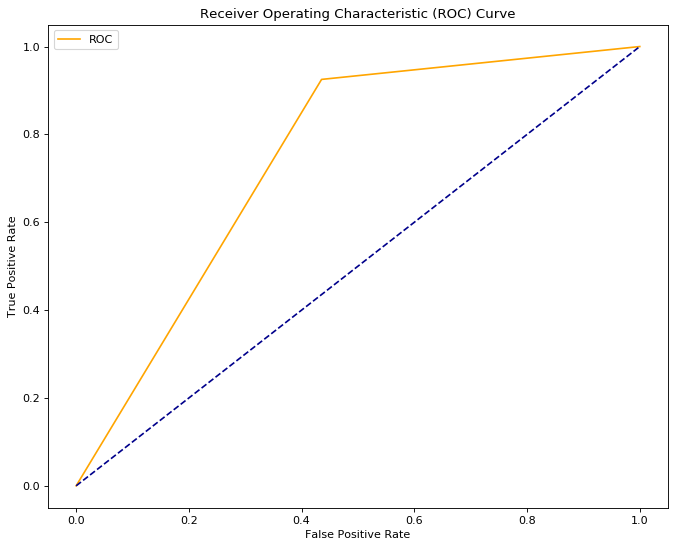

In [98]:
from matplotlib.pyplot import figure
def plot_roc_curve(fpr, tpr):
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = model2.predict(Xtest2)

fpr, tpr, thresholds = roc_curve(ytest, probs)
plot_roc_curve(fpr, tpr)

In [99]:
# Baseline model 2 - Logisitic regression with default parameters
model = sk.LogisticRegression()
modelfit(model, Xtrain2, ytrain, Xtest2, ytest)


Model Report
Accuracy : 0.8201
AUC Score: 0.779202
              precision    recall  f1-score   support

           0       0.70      0.46      0.56       937
           1       0.84      0.94      0.89      2887

    accuracy                           0.82      3824
   macro avg       0.77      0.70      0.72      3824
weighted avg       0.81      0.82      0.81      3824

[[ 430  507]
 [ 181 2706]]


In [100]:
ptest1 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
tuning = GridSearchCV(estimator = sk.LogisticRegression(), 
                        param_grid = ptest1, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain2,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.96302443, 1.02626657, 1.13798804, 1.08305874, 1.16047964,
         0.96406145, 0.87038016]),
  'std_fit_time': array([0.04334293, 0.08354655, 0.13165809, 0.06263281, 0.13647911,
         0.05690541, 0.13878544]),
  'mean_score_time': array([0.04194956, 0.04238424, 0.04750252, 0.04855065, 0.07017283,
         0.049577  , 0.03194594]),
  'std_score_time': array([0.00761973, 0.00472629, 0.00906903, 0.00893895, 0.0229294 ,
         0.00856589, 0.0048229 ]),
  'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'C': 0.001},
   {'C': 0.01},
   {'C': 0.1},
   {'C': 1},
   {'C': 10},
   {'C': 100},
   {'C': 1000}],
  'split0_test_score': array([0.7745098 , 0.83888889, 0.8503268 , 0.84738562, 0.84509804,
         0.8496732 , 0.84803922]),
  'split1_test_score': array([0.77476299, 0.82706767, 0.84439359, 0.84243217, 

In [101]:
ptest2 = {'max_iter' : [100,110,120,130,140] }
tuning = GridSearchCV(estimator = sk.LogisticRegression(C = 0.1), 
                        param_grid = ptest2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain2,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([1.02694893, 1.1305234 , 0.96886325, 1.22920823, 1.92691388]),
  'std_fit_time': array([0.0466765 , 0.05433764, 0.07395502, 0.2167328 , 0.61989123]),
  'mean_score_time': array([0.03932753, 0.05360069, 0.05119882, 0.13858123, 0.06409783]),
  'std_score_time': array([0.0035829 , 0.01175028, 0.00596588, 0.15678614, 0.02243435]),
  'param_max_iter': masked_array(data=[100, 110, 120, 130, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_iter': 100},
   {'max_iter': 110},
   {'max_iter': 120},
   {'max_iter': 130},
   {'max_iter': 140}],
  'split0_test_score': array([0.8503268, 0.8503268, 0.8503268, 0.8503268, 0.8503268]),
  'split1_test_score': array([0.84439359, 0.84439359, 0.84439359, 0.84439359, 0.84439359]),
  'split2_test_score': array([0.83458647, 0.83458647, 0.83458647, 0.83458647, 0.83458647]),
  'split3_test_score': array([0.8368748, 0.8368748, 0.8368748, 0.8368748, 0.83

In [102]:
ptest3 = {'dual' : [True,False] }
tuning = GridSearchCV(estimator = sk.LogisticRegression(C = 0.1, max_iter=100), 
                        param_grid = ptest3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain2,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([1.49724402, 1.51059837]),
  'std_fit_time': array([0.49301092, 0.73276731]),
  'mean_score_time': array([0.07878537, 0.06326165]),
  'std_score_time': array([0.0493969 , 0.03437354]),
  'param_dual': masked_array(data=[True, False],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'dual': True}, {'dual': False}],
  'split0_test_score': array([0.7745098, 0.8503268]),
  'split1_test_score': array([0.77476299, 0.84439359]),
  'split2_test_score': array([0.77476299, 0.83458647]),
  'split3_test_score': array([0.77476299, 0.8368748 ]),
  'split4_test_score': array([0.77468934, 0.84434271]),
  'mean_test_score': array([0.77469763, 0.84210487]),
  'std_test_score': array([9.81477459e-05, 5.68728991e-03]),
  'rank_test_score': array([2, 1], dtype=int32)},
 {'dual': False},
 0.842104871913061)

In [107]:
ptest4 = {'penalty' : ['l1', 'l2']}
tuning = GridSearchCV(estimator = sk.LogisticRegression(C = 0.1, max_iter=100, dual = False), 
                        param_grid = ptest4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain2,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.91002359, 0.72181268]),
  'std_fit_time': array([0.04789405, 0.13030099]),
  'mean_score_time': array([0.03784738, 0.03488879]),
  'std_score_time': array([0.00748802, 0.010192  ]),
  'param_penalty': masked_array(data=['l1', 'l2'],
               mask=[False, False],
         fill_value='?',
              dtype=object),
  'params': [{'penalty': 'l1'}, {'penalty': 'l2'}],
  'split0_test_score': array([0.84836601, 0.8503268 ]),
  'split1_test_score': array([0.84635502, 0.84439359]),
  'split2_test_score': array([0.83818241, 0.83458647]),
  'split3_test_score': array([0.83654789, 0.8368748 ]),
  'split4_test_score': array([0.84303466, 0.84434271]),
  'mean_test_score': array([0.8424972 , 0.84210487]),
  'std_test_score': array([0.0045525 , 0.00568729]),
  'rank_test_score': array([1, 2], dtype=int32)},
 {'penalty': 'l1'},
 0.8424971996502195)

In [108]:
model = sk.LogisticRegression(C = 0.1, max_iter=100, dual = False, penalty='l1')
modelfit(model, Xtrain2, ytrain, Xtest2, ytest)


Model Report
Accuracy : 0.8219
AUC Score: 0.772001
              precision    recall  f1-score   support

           0       0.71      0.46      0.56       937
           1       0.84      0.94      0.89      2887

    accuracy                           0.82      3824
   macro avg       0.78      0.70      0.72      3824
weighted avg       0.81      0.82      0.81      3824

[[ 429  508]
 [ 173 2714]]


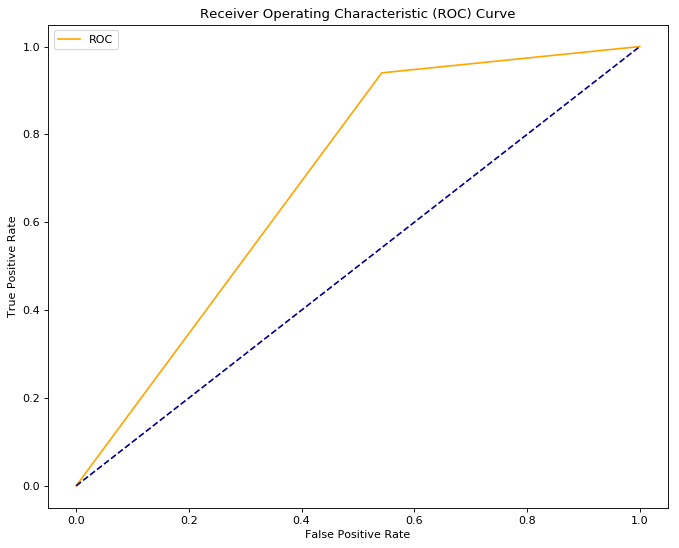

In [109]:
from matplotlib.pyplot import figure
def plot_roc_curve(fpr, tpr):
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = model.predict(Xtest2)

fpr, tpr, thresholds = roc_curve(ytest, probs)
plot_roc_curve(fpr, tpr)